In [1]:
# importing the necessary libraries (e.g., pandas, numpy, matplotlib, seaborn):
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
# loading the cereal dataset into a pandas DataFrame:
df = pd.read_csv('cereal.csv')

In [3]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [4]:
header=df.columns #storing column names
print(header)

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')


In [5]:
# more information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [6]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [7]:
df[df['carbo'] < 0] # gives us the rows that have negative carbohydrates

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [8]:
df[df['potass'] < 0] # gives us the rows that have negative potassium

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816


In [9]:
df[df['sugars']<0] # gives us the rows that have negative sugar

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [10]:
data=df.values
data=list(data)

#removing the rowes that had -1 values:
data.pop(4) 
data.pop(19)
data.pop(55)

array(['Quaker Oatmeal', 'Q', 'H', 100, 5, 2, 0, 2.7, -1.0, -1, 110, 0, 1,
       1.0, 0.67, 50.828392], dtype=object)

In [11]:
#New dataframe:
df_new=pd.DataFrame(data)
df_new.columns=header # We stored column names before.
df_new.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


In [12]:
df_new.describe() #summarizing the data again

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,107.027027,2.513514,1.000000,162.364865,2.175676,14.729730,7.108108,98.513514,29.054054,2.216216,1.030811,0.821622,42.371787
std,19.843893,1.075802,1.006826,82.769787,2.423391,3.891675,4.359111,70.878681,22.294352,0.832067,0.153416,0.235715,14.033712
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,135.000000,0.250000,12.000000,3.000000,41.250000,25.000000,1.250000,1.000000,0.670000,32.449210
50%,110.000000,2.500000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,1.000000,217.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.520611
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [13]:
df_new.shape

(74, 16)

In [14]:
df_new[df_new.duplicated()==True] # gives us any duplicate records

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


In [15]:
df.isna().sum() # no null values!

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

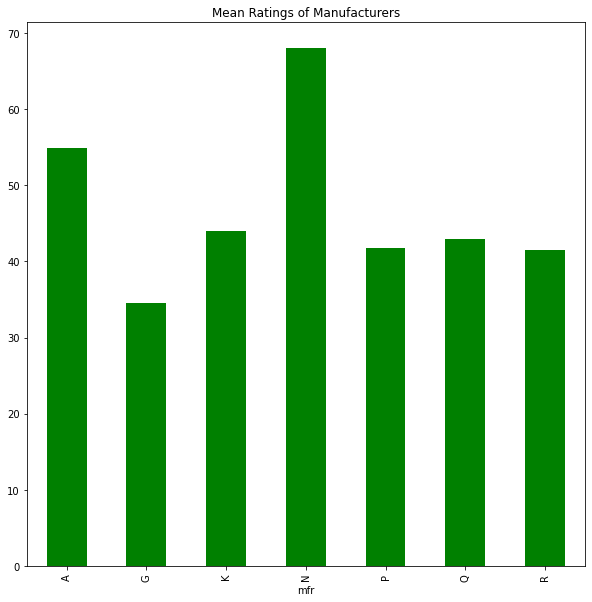

In [16]:
# We visualize the ratings among different manufacturers:
plt.figure(figsize=(10,10))
df.groupby('mfr')['rating'].mean().plot.bar(color='g')
plt.title('Mean Ratings of Manufacturers')
plt.show()

In [17]:
df_new.type.value_counts() #seeing the counts of cold and hot cereals

C    73
H     1
Name: type, dtype: int64

In [18]:
df_new.drop(["name","mfr","type","cups"],axis='columns',inplace=True)

In [19]:
df_new.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,93.704912
4,110,2,2,180,1.5,10.5,10,70,25,1,1.0,29.509541


In [20]:
df_new.shape

(74, 12)

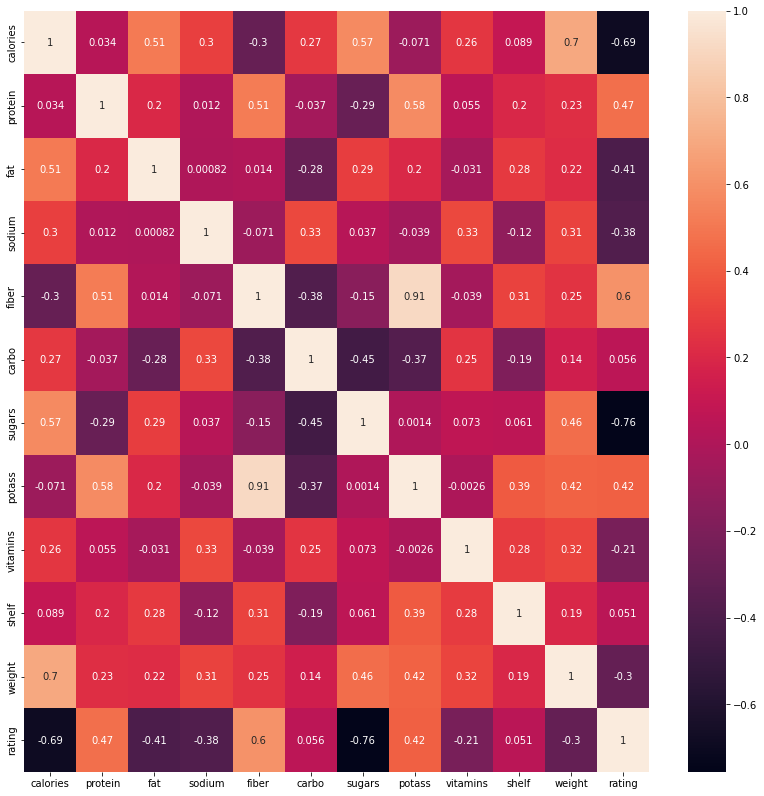

In [21]:
corr_mat=df_new.corr()
mat=corr_mat.values
plt.figure(figsize=(14,14))
sn.heatmap(corr_mat, annot=True)
plt.show()

In [22]:
df_new.drop(["weight"],axis='columns',inplace=True)

In [23]:
df_new.head() # checking out the dataframe

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,93.704912
4,110,2,2,180,1.5,10.5,10,70,25,1,29.509541


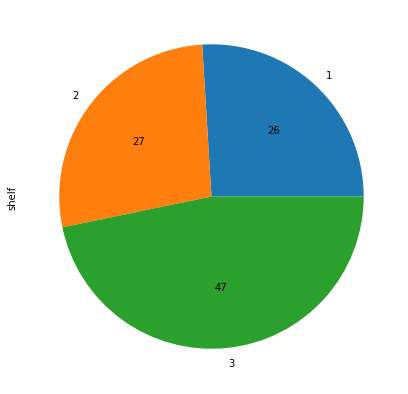

In [32]:
plt.figure(figsize=(7,7))
df.groupby('shelf')['shelf'].count().plot.pie(autopct = '%2.0f')
plt.show()

In [34]:
df_new.head() # checking out the dataframe

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,93.704912
4,110,2,2,180,1.5,10.5,10,70,25,1,29.509541


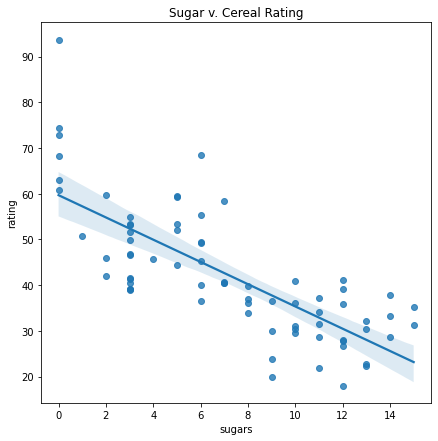

In [24]:
# We visualize the relation between Sugar & Rating
y_rating=df_new["rating"]
x_sugar=df_new["sugars"]
plt.figure(figsize=(7,7))
sn.regplot(x=x_sugar,y=y_rating) #regression best fit line command
plt.title('Sugar v. Cereal Rating')
plt.show()

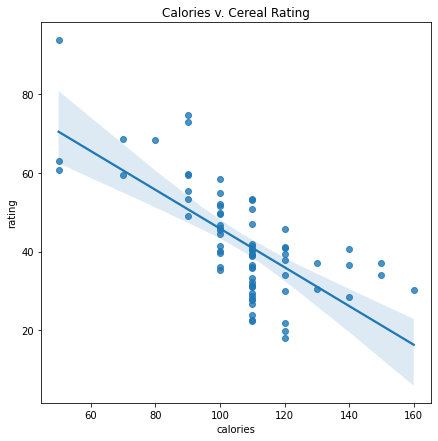

In [25]:
# We visualize the relation between Calories & Rating
x_calories=df_new["calories"]
plt.figure(figsize=(7,7))
sn.regplot(x=x_calories,y=y_rating)
plt.title('Calories v. Cereal Rating')
plt.show()

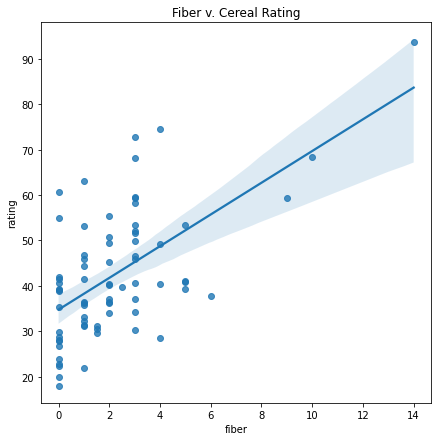

In [26]:
# Let's check for relationship between fiber & ratings
x_fiber=df_new["fiber"]
plt.figure(figsize=(7,7))
sn.regplot(x=x_fiber,y=y_rating)
plt.title('Fiber v. Cereal Rating')
plt.show()

In [31]:
dummies = pd.get_dummies(df_new['shelf'],prefix='shelf')

#We have creative dummies for shelves:
#shelf_1=> Shelf 1 Dummy
#shelf_2=> Shelf 2 Dummy
#shelf_3=> Shelf 3 Dummy

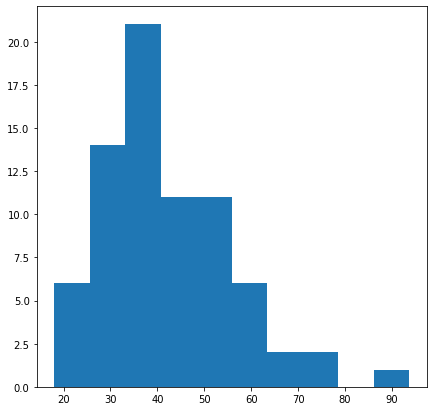

In [35]:
# Checking the distribution of ratings
plt.figure(figsize=(7,7))
plt.hist(y_rating)
plt.show()